In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [88]:
path = "/content/student_extended_ml_dataset2.csv"
df = pd.read_csv(path)

In [89]:
df.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low


In [90]:
len(df)

5000

In [91]:
len(df.columns)

10

In [92]:
df.tail()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High
4999,Christine Rodriguez,38,Male,1.627111,95,52,70,74,True,Low


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB


In [94]:
df.nunique()

Name                 4824
Age                    28
Gender                  2
Hours_Studied        5000
IQ                     71
Physics_Marks          61
Math_Marks             61
Chemistry_Marks        61
Has_Part_Time_Job       2
Study_Hours_Group       2
dtype: int64

In [95]:
df.isna()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


In [96]:
df.isnull()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


In [97]:
df.isnull().sum()

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
dtype: int64

In [98]:
(df.isnull().sum()/(len(df)))*100

Name                 0.0
Age                  0.0
Gender               0.0
Hours_Studied        0.0
IQ                   0.0
Physics_Marks        0.0
Math_Marks           0.0
Chemistry_Marks      0.0
Has_Part_Time_Job    0.0
Study_Hours_Group    0.0
dtype: float64

In [99]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [100]:
df.duplicated().sum()

0

In [101]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [102]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Female    2523
Male      2477
Name: Gender, dtype: int64


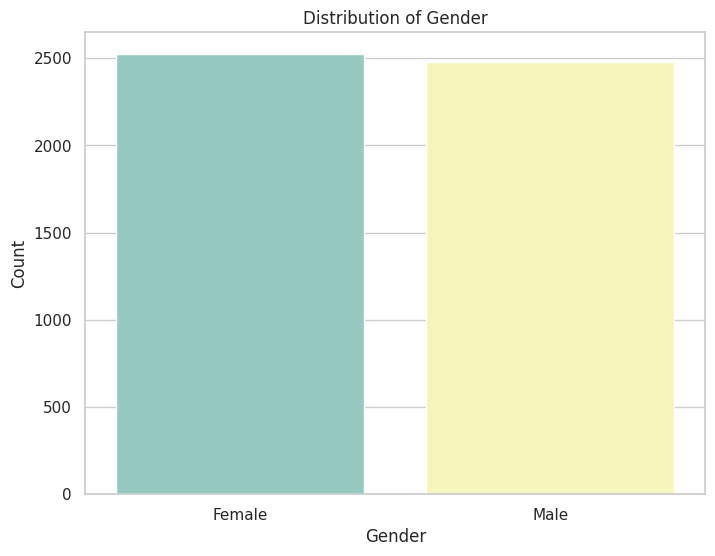

In [103]:
# Create a bar plot for gender counts.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set3")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


number of female and male students is almost same!!

In [104]:
df["Has_Part_Time_Job"].unique()

array([ True, False])

In [105]:
job_counts = df['Has_Part_Time_Job'].value_counts()
print(job_counts)

True     2525
False    2475
Name: Has_Part_Time_Job, dtype: int64


In [106]:
df["Study_Hours_Group"].unique()

array(['High', 'Low'], dtype=object)

In [107]:
Study_Hours_Group_counts = df['Study_Hours_Group'].value_counts()
print(Study_Hours_Group_counts)

High    2763
Low     2237
Name: Study_Hours_Group, dtype: int64


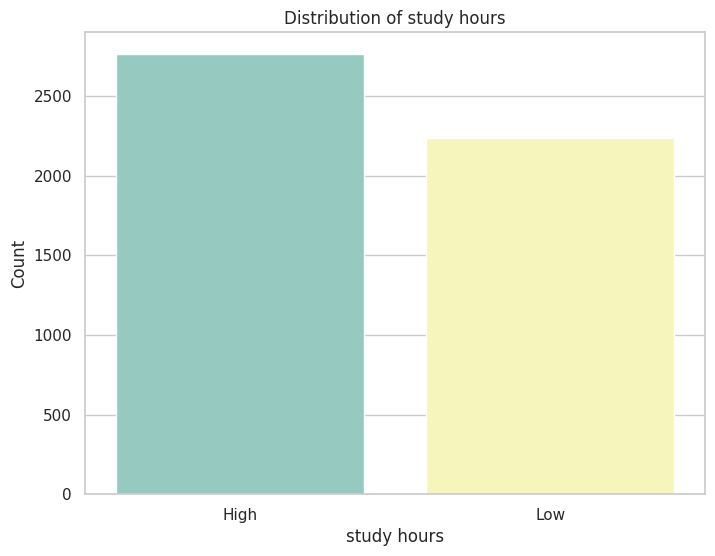

In [108]:
# Create a bar plot for Study_Hours_Group counts.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=Study_Hours_Group_counts.index, y=Study_Hours_Group_counts.values, palette="Set3")
plt.title("Distribution of study hours")
plt.xlabel("study hours")
plt.ylabel("Count")
plt.show()

In [109]:
print(df["Age"].min())
print(df["Age"].max())


18
45


In [110]:
print(df["IQ"].min())
print(df["IQ"].max())

80
150


##Feature Engineering

In [111]:
df['Percentage'] = (df['Math_Marks']+df['Physics_Marks']+df['Chemistry_Marks'])/3

In [112]:
df.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Percentage
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,71.666667
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,73.666667
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,65.333333
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,79.666667
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,75.333333


In [113]:
df.describe()

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Percentage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800,69.975267
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913,10.137999
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000,41.666667
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000,63.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000,77.333333
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000,98.333333


In [114]:
df.corr()

<ipython-input-114-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Percentage
Age,1.000000,0.017165,-0.013193,0.010405,-0.010184,-0.009024,0.000387,-0.004988
Hours_Studied,0.017165,1.000000,-0.010782,-0.001311,0.005998,-0.000587,0.002944,0.002356
IQ,-0.013193,-0.010782,1.000000,-0.011610,0.000631,-0.027027,0.005901,-0.021953
Physics_Marks,0.010405,-0.001311,-0.011610,1.000000,0.000443,-0.001516,0.005244,0.583113
Math_Marks,-0.010184,0.005998,0.000631,0.000443,1.000000,-0.004683,-0.014587,0.574163
Chemistry_Marks,-0.009024,-0.000587,-0.027027,-0.001516,-0.004683,1.000000,0.013749,0.571411
Has_Part_Time_Job,0.000387,0.002944,0.005901,0.005244,-0.014587,0.013749,1.000000,0.002557
Percentage,-0.004988,0.002356,-0.021953,0.583113,0.574163,0.571411,0.002557,1.000000


In [115]:
correlation_matrix = df[['Hours_Studied', 'Percentage']].corr().head()
print(correlation_matrix)


               Hours_Studied  Percentage
Hours_Studied       1.000000    0.002356
Percentage          0.002356    1.000000


<Axes: >

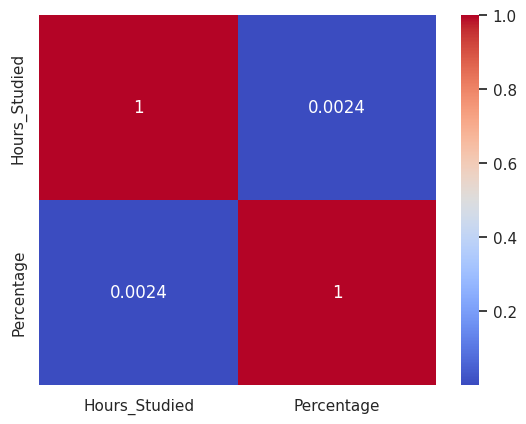

In [116]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

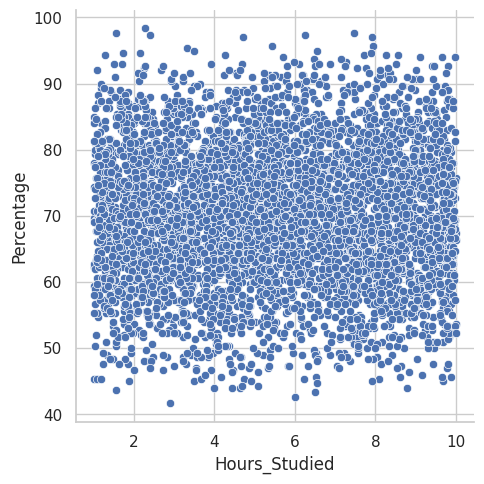

In [117]:
sns.relplot(x='Hours_Studied',y='Percentage', data=df)

#plt.scatter('Hours_Studied','Percentage', data=df.sample(n=50))
#sns.show()

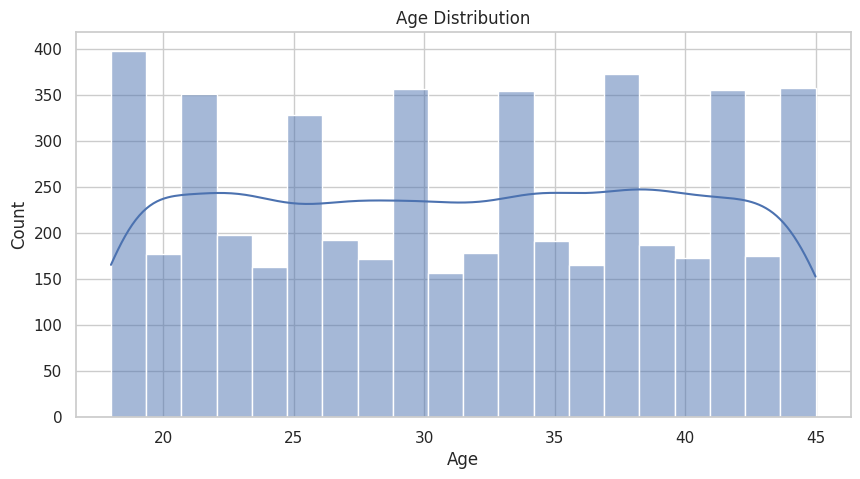

In [118]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


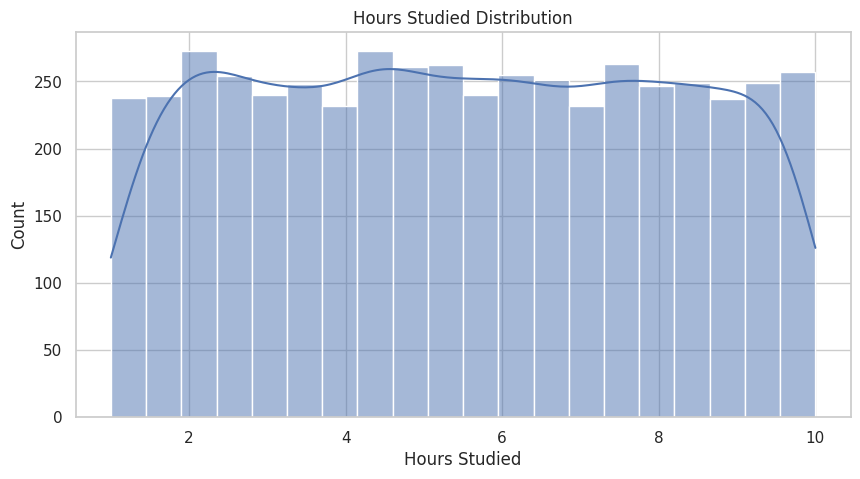

In [119]:
# Hours Studied Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Hours_Studied"], bins=20, kde=True)
plt.title("Hours Studied Distribution")
plt.xlabel("Hours Studied")
plt.show()

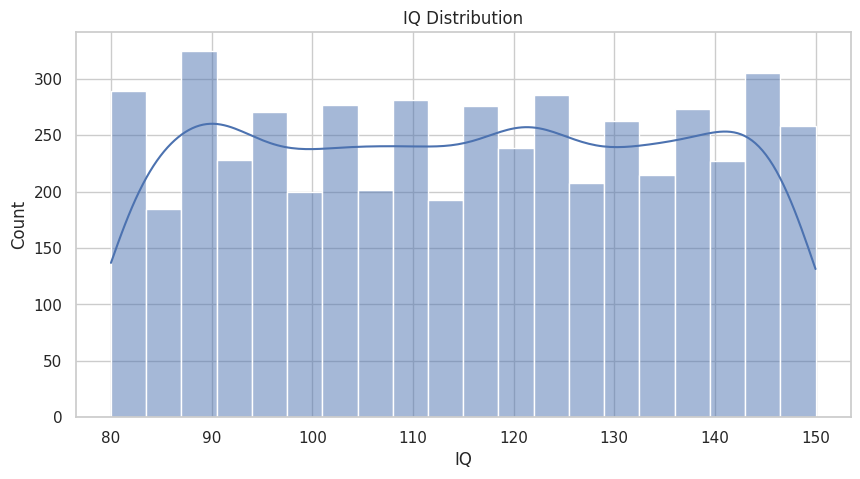

In [120]:
# IQ Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["IQ"], bins=20, kde=True)
plt.title("IQ Distribution")
plt.xlabel("IQ")
plt.show()

<ipython-input-121-e57dfc5a7abe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


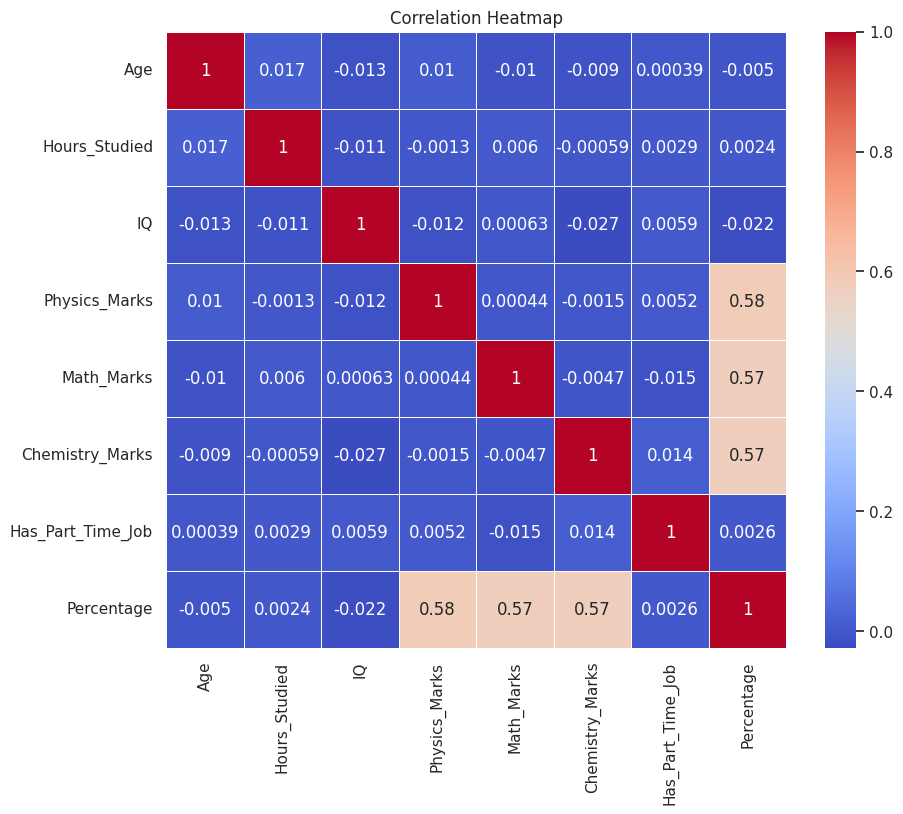

In [121]:

# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

#MODEL

In [130]:
subjects = ["Physics_Marks", "Math_Marks", "Chemistry_Marks"]
X = df[["Hours_Studied", "IQ"]]
y = df[subjects]

# Split the dataset into a training set and a testing set (you can adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create separate regression models for each subject
models = {}
for subject in subjects:
    model = LinearRegression()
    model.fit(X_train, y_train[subject])
    models[subject] = model

# Evaluate the models
for subject, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[subject], y_pred)
    r2 = r2_score(y_test[subject], y_pred)
    print(f"Subject: {subject}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print()

    models = {}
for subject in subjects:
    model = LinearRegression()
    model.fit(X_train, y_train[subject])
    models[subject] = model

# Initialize an empty list to store predictions for all subjects
y_pred_all_subjects = []

# Make predictions for all subjects and store them in the list
for subject, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_all_subjects.append(y_pred)

# Stack the predictions horizontally to get predictions for all subjects combined
y_pred_combined = pd.DataFrame(y_pred_all_subjects).T

# Calculate the MAE for all subjects combined
mae_combined = mean_absolute_error(y_test, y_pred_combined)
print(f"Mean Absolute Error (Combined Subjects): {mae_combined}")
print()
# Predict using the models (example prediction for a new data point)
new_data_point = pd.DataFrame({"Hours_Studied": [6], "IQ": [120]})
for subject, model in models.items():
    predicted_marks = model.predict(new_data_point)
    print(f"Predicted {subject} Marks: {predicted_marks[0]}")

Subject: Physics_Marks
Mean Squared Error: 318.6924664190221
R-squared: 6.264136267064568e-05

Subject: Math_Marks
Mean Squared Error: 303.1229663352181
R-squared: -0.0034194823420343745

Subject: Chemistry_Marks
Mean Squared Error: 315.03019008586847
R-squared: -0.0017911138089874434

Mean Absolute Error (Combined Subjects): 15.287655711686606

Predicted Physics_Marks Marks: 70.22456801086086
Predicted Math_Marks Marks: 69.66041270453397
Predicted Chemistry_Marks Marks: 69.49617011270352
